### First of all, there is no standard way to deal with missing values. 
### But the ideal way is to consider how many missing values each column of the dataset has and how important it is in the future.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from word2number import w2n

In [2]:
df = pd.read_csv('airline.csv')
df.head()

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
0,New York-London,Delta,New York,USA,DL101,500,2023-03-01 12:45:00,0.0,5564.0,230
1,Los Angeles-Tokyo,United,Los Angeles,USA,UA201,700,2023-03-02 18:30:00,15.0,9087.0,280
2,Sydney-Hong Kong,Qantas,Sydney,Australia,QF202,800,2023-03-03 09:15:00,30.0,7361.0,215
3,New York-Paris,Delta Air Lines,PaRis,France,DL301,700,2023-03-01 12:30:00,10.0,3630.0,185
4,London-New York,Virgin Atlantic,LonDon,UK,VS302,800,2023-03-02 14:00:00,20.0,3450.0,170


In [3]:
# we want those columns who have null values

cols = df.columns[df.isnull().any()]
df[cols].isnull().sum()

Ticket Price            29
Delayed Minutes         27
Flight Distance (km)     7
Number of Passengers    49
dtype: int64

In [4]:
# those column have null values 
df[df.isnull().any(axis=1)].head(5)

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
48,Dubai-London,Emirates,Dubai,UAE,EK501,350,2023-03-29 13:25:00,14.0,NaN,NaN
111,"Dubai-Bangkok""",Thai Airways International,Dubai,UAE,TG701,220,2023-04-16 08:00:00,10.0,4290.0,NaN
112,Seattle-Denver,United Airlines,Seattle,USA,UA101,$250,2023-04-11 08:00:00,10.0,1022.0,NaN
113,Boston-Chicago,American Airlines,Boston,USA,AA201,$300,2023-04-12 10:30:00,NaN,1296.0,NaN
114,London-Rome,British Airways,London,UK,BA301,£200,2023-04-13 12:15:00,7.0,890.0,NaN


In [5]:
# print the specific columns that have null values

NaN_rows = df[df[['Delayed Minutes','Ticket Price']].isna().any(axis=1)] 
NaN_rows.head()

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
113,Boston-Chicago,American Airlines,Boston,USA,AA201,$300,2023-04-12 10:30:00,NaN,1296.0,NaN
115,Dubai-Mumbai,Emirates,Dubai,UAE,EK401,500,2023-04-14 14:45:00,NaN,1289.0,NaN
118,New York-Miami,Delta Air Lines,New York,USA,DL701,$200,2023-04-17 20:10:00,NaN,1050.0,NaN
119,Beijing-Shanghai,Air China,Beijing,China,CA901,¥1,500,NaN,NaN,752
121,Houston-Dallas,Southwest Airlines,Houston,USA,WN401,$120,2023-04-20 01:40:00,NaN,558.0,NaN


### Missing value percentage

In [12]:
print('Amount of missing values in--:')

for col in df.columns:
    percentage_of_missing_val = np.mean(df[col].isna())
    print(f'{col}: {round(percentage_of_missing_val*100)}%')

Amount of missing values in--:
Airline Route: 0%
Airline Name: 0%
City: 0%
Country: 0%
Flight No: 0%
Ticket Price: 7%
Flight Datetime: 0%
Delayed Minutes: 7%
Flight Distance (km): 2%
Number of Passengers: 12%


### Missing value Visualize

<AxesSubplot:>

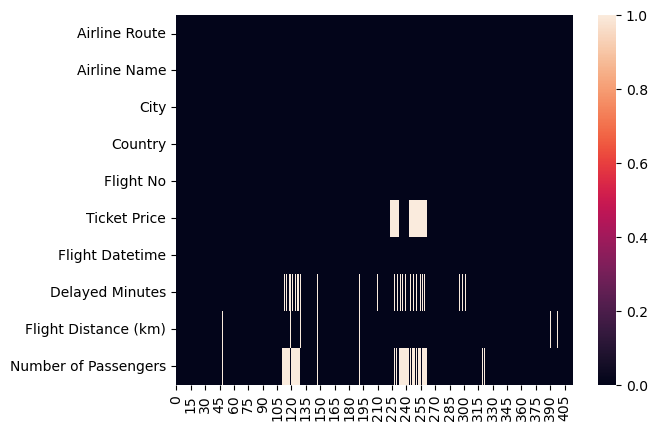

In [9]:
sns.heatmap(df.isna().transpose())

# Cleaning Operation

### Ticket Price

* In our dataset we have some unusual problem. Part of the value in our 'Ticket Price' column is carried over to the next column, 'Flight DateTime'. I will bring that value to its original column i.e. 'Ticket Price' column and the nan value will sit  in that place in the 'Flight Datetime' column.


In [212]:
# Notice these column --> 'Ticket Price' and 'Flight Datetime' 
df.loc[[210]]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
210,Abu Dhabi-Mumbai,Etihad Airways,Mumbai,India,EY-202,₹12,560,NaN,1205.0,150


In [213]:
# Here we use string manipulation functions
# iterrows() method generate a iterator object, which iterate each row of the dataframe.

for index, row in df.iterrows():
    # Check if the 'Flight Datetime' column contains a number
    if str(row['Flight Datetime']).isdigit():
        # Extract the last 3 digits from the 'Flight Datetime' column
        last_3_digits = str(row['Flight Datetime'])[-3:]
        # Add the last 3 digits to the 'Ticket Price' column
        df.at[index, 'Ticket Price'] = str(row['Ticket Price']) + last_3_digits
        # Set the value of the 'Flight Datetime' column to NaN
        df.at[index, 'Flight Datetime'] = np.nan

In [214]:
# we did what we want to
df.iloc[[210]]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
210,Abu Dhabi-Mumbai,Etihad Airways,Mumbai,India,EY-202,₹12560,NaN,NaN,1205.0,150


* Our Ticket price column has currency symbol and some non-numeric value. Lot's of symbols or unclean values.

* To remove them, we can use Regular Expression.

In [215]:
df.iloc[122:126]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
122,Toronto-Montreal,WestJet,Toronto,Canada,WS501,CAD200,2023-04-21 03:30:00,11.0,311.0,NaN
123,Sydney-Brisbane,Virgin Australia,Sydney,Australia,VA701,AUD150,2023-04-22 05:20:00,12.0,466.0,NaN
124,Amsterdam-Berlin,KLM Royal Dutch Airlines,Amsterdam,Netherlands,KL901,€180,2023-04-23 07:10:00,NaN,578.0,NaN
125,Singapore-Kuala Lumpur,Singapore Airlines,Singapore,Singapore,SQ301,SGD200,2023-04-24 09:00:00,14.0,330.0,NaN


In [216]:
import regex as re 

df['Ticket Price'] = df['Ticket Price'].apply(lambda x: re.sub(r'[^0-9]', '', str(x)))
df.iloc[122:126]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
122,Toronto-Montreal,WestJet,Toronto,Canada,WS501,200,2023-04-21 03:30:00,11.0,311.0,NaN
123,Sydney-Brisbane,Virgin Australia,Sydney,Australia,VA701,150,2023-04-22 05:20:00,12.0,466.0,NaN
124,Amsterdam-Berlin,KLM Royal Dutch Airlines,Amsterdam,Netherlands,KL901,180,2023-04-23 07:10:00,NaN,578.0,NaN
125,Singapore-Kuala Lumpur,Singapore Airlines,Singapore,Singapore,SQ301,200,2023-04-24 09:00:00,14.0,330.0,NaN


In [217]:
# Also our 'Ticket Price' column has empty string. We have to make it NaN

df['Ticket Price'] = pd.to_numeric(df['Ticket Price'], errors='coerce')

## Check Outliers

* We are checking outliers using skewness. 
* Skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution.

In [218]:
df['Ticket Price'].skew()

8.869521779550016

* The skewness is which means here presence of extreme higher values and it's a positive skewness. 
* Also check the max and mean

In [219]:
df['Ticket Price'].describe()

count      385.000000
mean       559.428571
std        810.330476
min         50.000000
25%        150.000000
50%        300.000000
75%        800.000000
max      12560.000000
Name: Ticket Price, dtype: float64

### We will fix the outlier values using 'Capping' and quantile() method.

* Capping is a data cleaning technique that involves limiting the values in a dataset to fall within a certain range or percentile. This technique is useful for handling extreme values or outliers that may skew the analysis or modeling of the data.

In [220]:
print(df['Ticket Price'].quantile(0.10))
print(df['Ticket Price'].quantile(0.90))

100.0
1400.0


In [221]:
# Capping

df['Ticket Price'] = np.where(df['Ticket Price'] < 100, 100, df['Ticket Price'])
df['Ticket Price'] = np.where(df['Ticket Price'] > 1400, 1400, df['Ticket Price'])

In [222]:
df['Ticket Price'].skew()

0.9840210226148443

## Our skewness value is much better now.

In [223]:
df['Ticket Price'].value_counts(dropna=False).head(8)

100.0     62
1400.0    41
200.0     29
NaN       29
150.0     25
400.0     19
250.0     17
300.0     15
Name: Ticket Price, dtype: int64

#### Interpolation
* Interpolation is a method for estimating missing values in a dataset based on the values of neighboring data points.
* In the context of data analysis, interpolation is often used for time series data or spatial data where the values of adjacent data points are expected to be similar.

In [224]:
# we have some NaN values in 'Ticket Price' column
df.iloc[225:230]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
225,Solomon Islands to Ireland,Cathay Pacific,Dublin,Ireland,CX111,NaN,2023-03-02 14:35:00,18.0,13500.0,45
226,Madagascar to Jamaica,Singapore Airlines,Kingston,Jamaica,SQ871,NaN,2023-03-03 20:00:00,5.0,12000.0,22
227,Ireland to Greece,Japan Airlines,Athens,Greece,JL719,NaN,2023-03-04 09:10:00,5.0,2400.0,NaN
228,Jamaica to Iceland,Thai Airways,Reykjavik,Iceland,TG201,NaN,2023-03-05 13:30:00,NaN,5000.0,NaN
229,Greece to Greenland,Korean Air,Nuuk,Greenland,KE347,NaN,2023-03-06 06:15:00,20.0,10500.0,33


In [225]:
# we will fill this NaN values using 'linear interpolation'

df['Ticket Price'] = df['Ticket Price'].interpolate(method='linear')

In [226]:
df.iloc[225:230]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
225,Solomon Islands to Ireland,Cathay Pacific,Dublin,Ireland,CX111,290.0,2023-03-02 14:35:00,18.0,13500.0,45
226,Madagascar to Jamaica,Singapore Airlines,Kingston,Jamaica,SQ871,290.0,2023-03-03 20:00:00,5.0,12000.0,22
227,Ireland to Greece,Japan Airlines,Athens,Greece,JL719,290.0,2023-03-04 09:10:00,5.0,2400.0,NaN
228,Jamaica to Iceland,Thai Airways,Reykjavik,Iceland,TG201,290.0,2023-03-05 13:30:00,NaN,5000.0,NaN
229,Greece to Greenland,Korean Air,Nuuk,Greenland,KE347,290.0,2023-03-06 06:15:00,20.0,10500.0,33


* This looks nice and clear

### Delayed Minutes

In [227]:
# there are 39 NaN values. We will fill it with the mode.

df['Delayed Minutes'].value_counts(dropna=False).head(10)

10.0    63
15.0    60
0.0     48
20.0    46
5.0     32
30.0    27
NaN     27
25.0    21
8.0     15
4.0      9
Name: Delayed Minutes, dtype: int64

#### ffill and bfill

In [228]:
# I use together 'ffill' and 'bfill' method

df['Delayed Minutes'] = df['Delayed Minutes'].fillna(method='ffill').fillna(method='bfill')

### Flight Distance (km)

In [229]:
df['Flight Distance (km)'].value_counts(dropna=False).head(10)

500.0     11
400.0     10
1200.0     8
NaN        7
1000.0     7
900.0      6
450.0      6
700.0      5
300.0      5
350.0      5
Name: Flight Distance (km), dtype: int64

In [230]:
# The rows in the 'Flight Distance (km)' column contain nan values

df[df['Flight Distance (km)'].isna()]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
48,Dubai-London,Emirates,Dubai,UAE,EK501,350.0,2023-03-29 13:25:00,14.0,NaN,NaN
119,Beijing-Shanghai,Air China,Beijing,China,CA901,1400.0,NaN,5.0,NaN,752
129,Shanghai-Guangzhou,China Eastern Airlines,Shanghai,China,MU901,1200.0,NaN,14.0,NaN,976
147,Los Angeles-Las Vegas,Allegiant Air,Los Angeles,USA,G4026,100.0,2023-10-11 10:25:00,10.0,NaN,NaN
191,Osaka-Bangkok,Japan Airlines,Osaka,Japan,JL018,900.0,2023-03-18 10:10:00,10.0,NaN,NaN
390,Toronto-Vancouver,Air Canada,Toronto,Canada,AC456,250.0,2020-06-22 14:30:00,15.0,NaN,150
398,Dublin-Shannon,Ryanair,Dublin,Ireland,RR321,100.0,2020-06-30 14:30:00,0.0,NaN,200


In [231]:
# we fill it with the median value

df['Flight Distance (km)'].median()

1758.0

### Check Outlier with Z_Score

* Before fill this NaN values with median we want to check if there are any outlier values

* Using Z_SCORE

In [232]:
z_score = np.abs((df['Flight Distance (km)'] - df['Flight Distance (km)'].mean()) / df['Flight Distance (km)'].std())

In [233]:
if (z_score < 0).any():
    print('There are negative z-score in the column')
else:
    print('There are no negative z-score in the column')

There are no negative z-score in the column


In [234]:
outlier_threshold = 3
outliers = df[z_score > outlier_threshold]
outliers

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
187,Sydney-London,Qantas Airways,Sydney,Australia,QF014,1400.0,2023-03-14 18:45:00,15.0,17100.0,220
295,Dubai-Los Angeles,Emirates,Dubai,United Arab Emirates,EK910,1400.0,2023-01-17 12:45:00,0.0,17500.0,250
296,Doha-Santiago,Qatar Airways,Doha,Qatar,QR811,1400.0,2023-01-18 12:45:00,10.0,17400.0,300


In [235]:
# without our outlier value we have to find out median value

non_outliers = df[z_score <= outlier_threshold]
median = non_outliers['Flight Distance (km)'].median()

In [236]:
median

# We can clearly see how our outlier values affect our median values.

1675.0

In [237]:
# Now I fill NaN values with our new median value.

df['Flight Distance (km)'] = df['Flight Distance (km)'].fillna(median)

### Number of Passengers

In [238]:
# Number of Passengers is a numeric column but there is some percentile (%) sign

df.iloc[148:150]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
148,New York-London,American Airlines,New York,USA,AA101,600.0,2023-03-01 12:30:00,10.0,3440.0,55%
149,Los Angeles-Tokyo,Delta Air Lines,Los Angeles,USA,DL102,800.0,2023-03-02 14:00:00,15.0,5485.0,75%


In [239]:
# remove % sign

df['Number of Passengers'] = df['Number of Passengers'].str.rstrip('%')

* Although this is a numeric column, there are several string values ​​that are important. We have to convert these string values to it's original form.


In [240]:
df.iloc[50:55]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
50,London-Paris,British Airways,London,UK,BA201,200.0,2023-04-02 12:00:00,10.0,344.0,One hundred and twenty
51,Sydney-Brisbane,Qantas Airways,Sydney,Australia,QF301,150.0,2023-04-03 15:15:00,0.0,732.0,Ninety-five
52,Dubai-Mumbai,Etihad Airways,Dubai,UAE,EY401,250.0,2023-04-04 08:45:00,20.0,1927.0,One hundred and eighty
53,Toronto-Montreal,Porter Airlines,Toronto,Canada,PD501,100.0,2023-04-05 10:20:00,5.0,505.0,Fifty
54,Tokyo-Beijing,Japan Airlines,Tokyo,Japan,JL701,300.0,2023-04-06 13:35:00,6.0,2074.0,Two hundred and ten


In [241]:
# we are using word2number module

df['Number of Passengers'] = df['Number of Passengers'].apply(lambda x: int(x) if str(x).isdigit() else w2n.word_to_num(x) if isinstance(x, str) else x)

In [242]:
df.iloc[50:55]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
50,London-Paris,British Airways,London,UK,BA201,200.0,2023-04-02 12:00:00,10.0,344.0,120.0
51,Sydney-Brisbane,Qantas Airways,Sydney,Australia,QF301,150.0,2023-04-03 15:15:00,0.0,732.0,95.0
52,Dubai-Mumbai,Etihad Airways,Dubai,UAE,EY401,250.0,2023-04-04 08:45:00,20.0,1927.0,180.0
53,Toronto-Montreal,Porter Airlines,Toronto,Canada,PD501,100.0,2023-04-05 10:20:00,5.0,505.0,50.0
54,Tokyo-Beijing,Japan Airlines,Tokyo,Japan,JL701,300.0,2023-04-06 13:35:00,6.0,2074.0,210.0


* There is also some NaN values in this column

### Fill NaN values with IQR

In [243]:
Q1 = df['Number of Passengers'].quantile(0.25)
Q3 = df['Number of Passengers'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

115.0


In [244]:
# Fill NaN values with Interquartile Range

df['Number of Passengers'] = df['Number of Passengers'].fillna(IQR)

In [245]:
# this function generates boolean results -- True and False

#def is_outlier(x):
#    return (x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))
#df['Outlier'] = df['Number of Passengers'].apply(is_outlier)

In [246]:
#len(df['Outlier'])

In [247]:
#df1 = df1.drop(df.iloc[[119,129,204]].index)
#df1 = df.copy()

### Flight Datetime

In [248]:
df[df['Flight Datetime'].isna()]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
119,Beijing-Shanghai,Air China,Beijing,China,CA901,1400.0,NaN,5.0,1675.0,752.0
129,Shanghai-Guangzhou,China Eastern Airlines,Shanghai,China,MU901,1200.0,NaN,14.0,1675.0,976.0
210,Abu Dhabi-Mumbai,Etihad Airways,Mumbai,India,EY-202,1400.0,NaN,0.0,1205.0,150.0


In [249]:
# Fill the NaN value with 'Forward Fill'

df['Flight Datetime'] = df['Flight Datetime'].fillna(method='ffill')

In [250]:
# convert column to it's actual data-type

df['Flight Datetime'] = pd.to_datetime(df['Flight Datetime'])

In [251]:
# Check the data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Airline Route         414 non-null    object        
 1   Airline Name          414 non-null    object        
 2   City                  414 non-null    object        
 3   Country               414 non-null    object        
 4   Flight No             414 non-null    object        
 5   Ticket Price          414 non-null    float64       
 6   Flight Datetime       414 non-null    datetime64[ns]
 7   Delayed Minutes       414 non-null    float64       
 8   Flight Distance (km)  414 non-null    float64       
 9   Number of Passengers  414 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 32.5+ KB


### Airline Name

In [252]:
# Check the Airline Name column

df.iloc[164:170]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
164,London-New York,+9American Airlines,London,UK,AA101,500.0,2023-03-01 08:00:00,20.0,3450.0,80.0
165,Paris-Dubai,Emirates!,Paris,France,EK102,700.0,2023-03-02 10:30:00,15.0,3630.0,70.0
166,New York-Los Angeles,Delta@ Air-Lines,New York,USA,DL103,600.0,2023-03-03 12:45:00,5.0,2450.0,90.0
167,Beijing-Tokyo,Japan (Airlines),Tokyo,Japan,JL104,800.0,2023-03-04 14:00:00,25.0,1850.0,70.0
168,Sydney-London,*^Qantas Airways,London,UK,QF105,900.0,2023-03-05 16:30:00,30.0,10550.0,95.0
169,Paris-Singapore,Singapore*& Airlines,Singapore,Singapore,SQ106,1000.0,2023-03-06 18:00:00,10.0,6630.0,80.0


In [253]:
# first re.sub() removes all digits and underscores, and the second re.sub() removes all non-alphanumeric characters 
# except whitespace.

df['Airline Name'] = df['Airline Name'].apply(lambda x: re.sub(r'[^\w\s]', '', re.sub(r'[\d_]+', '', x)))

In [254]:
df.iloc[164:170]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
164,London-New York,American Airlines,London,UK,AA101,500.0,2023-03-01 08:00:00,20.0,3450.0,80.0
165,Paris-Dubai,Emirates,Paris,France,EK102,700.0,2023-03-02 10:30:00,15.0,3630.0,70.0
166,New York-Los Angeles,Delta AirLines,New York,USA,DL103,600.0,2023-03-03 12:45:00,5.0,2450.0,90.0
167,Beijing-Tokyo,Japan Airlines,Tokyo,Japan,JL104,800.0,2023-03-04 14:00:00,25.0,1850.0,70.0
168,Sydney-London,Qantas Airways,London,UK,QF105,900.0,2023-03-05 16:30:00,30.0,10550.0,95.0
169,Paris-Singapore,Singapore Airlines,Singapore,Singapore,SQ106,1000.0,2023-03-06 18:00:00,10.0,6630.0,80.0


### City

In [255]:
# Check the 'City' column.
# The names of cities sometimes have capital letters in the middle and sometimes small letters at the beginning.

df.iloc[6:10]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
6,Dubai-Mumbai,Emirates,DubAI,India,EK304,500.0,2023-03-04 16:20:00,5.0,1200.0,150.0
7,Los Angeles-Tokyo,Japan Airlines,ToKyo,Japan,JL305,900.0,2023-03-05 09:10:00,30.0,5450.0,190.0
8,Paris-Toronto,Air France,torOntO,Canada,AF306,600.0,2023-03-06 18:00:00,35.0,5760.0,160.0
9,Bangkok-Sydney,Thai Airways,sydneY,Australia,TG307,750.0,2023-03-07 10:45:00,25.0,4140.0,175.0


In [256]:
# Here we have used the capitalize() method which will convert the first character to uppercase letter and 
# the remaining alphabets to lowercase.
 
df['City'] = df['City'].str.capitalize()

In [257]:
df.iloc[6:10]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
6,Dubai-Mumbai,Emirates,Dubai,India,EK304,500.0,2023-03-04 16:20:00,5.0,1200.0,150.0
7,Los Angeles-Tokyo,Japan Airlines,Tokyo,Japan,JL305,900.0,2023-03-05 09:10:00,30.0,5450.0,190.0
8,Paris-Toronto,Air France,Toronto,Canada,AF306,600.0,2023-03-06 18:00:00,35.0,5760.0,160.0
9,Bangkok-Sydney,Thai Airways,Sydney,Australia,TG307,750.0,2023-03-07 10:45:00,25.0,4140.0,175.0


### Airline Route

In [258]:
# There are some inconsistencies in the values in our Airline Route column. 
# Somewhere (-) symbol or somewhere (to) is used.
# We have to make the values of the same type.

df.iloc[255:260]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
255,Singapore to Hong Kong,Cathay Pacific,Hong kong,Hong Kong,CX759,103.5,2023-03-16 12:50:00,11.0,1600.0,115.0
256,London to Madrid,British Airways,Madrid,Spain,BA462,103.0,2023-03-17 09:00:00,20.0,1260.0,10.0
257,Los Angeles to Sydney,United Airlines,Sydney,Australia,UA840,102.5,2023-03-18 17:30:00,20.0,7480.0,115.0
258,Oslo to Moscow,Aeroflot,Moscow,Russia,SU330,102.0,2023-03-19 14:45:00,20.0,1525.0,115.0
259,Seoul to Manila,Philippine Airlines,Manila,Philippines,PR416,101.5,2023-03-20 10:10:00,20.0,1530.0,115.0


In [259]:
df['Airline Route'] = df['Airline Route'].str.replace('to', '-')

In [260]:
df.iloc[255:260]

,Airline Route,Airline Name,City,Country,Flight No,Ticket Price,Flight Datetime,Delayed Minutes,Flight Distance (km),Number of Passengers
255,Singapore - Hong Kong,Cathay Pacific,Hong kong,Hong Kong,CX759,103.5,2023-03-16 12:50:00,11.0,1600.0,115.0
256,London - Madrid,British Airways,Madrid,Spain,BA462,103.0,2023-03-17 09:00:00,20.0,1260.0,10.0
257,Los Angeles - Sydney,United Airlines,Sydney,Australia,UA840,102.5,2023-03-18 17:30:00,20.0,7480.0,115.0
258,Oslo - Moscow,Aeroflot,Moscow,Russia,SU330,102.0,2023-03-19 14:45:00,20.0,1525.0,115.0
259,Seoul - Manila,Philippine Airlines,Manila,Philippines,PR416,101.5,2023-03-20 10:10:00,20.0,1530.0,115.0


### Although here we can create two new columns by breaking the Airline Route column.
* Departure
* Arrival